In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/usr/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
file_path = 'dataset/Construction_Data_PM_Tasks_All_Projects.csv'
df = pd.read_csv(file_path)

In [3]:
# Pilih kolom penting
columns_used = ['Status', 'Type', 'Priority', 'Cause', 'project', 'OverDue']
df = df[columns_used]

In [4]:
# Drop data kosong
df = df.dropna()

In [5]:
# Encode fitur kategori
label_encoders = {}
for col in ['Status', 'Type', 'Priority', 'Cause', 'project']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# Target
X = df.drop('OverDue', axis=1)
y = df['OverDue'].map({False: 0, True: 1})  # Biar jadi 0 dan 1


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Prediksi
y_pred = model.predict(X_test)

In [9]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9976190476190476

Confusion Matrix:
 [[407   1]
 [  0  12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.92      1.00      0.96        12

    accuracy                           1.00       420
   macro avg       0.96      1.00      0.98       420
weighted avg       1.00      1.00      1.00       420



In [10]:
# --- SHAP Explanation ---
# Inisialisasi SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [11]:
print(X_test)

       Status  Type  Priority  Cause  project
140         6     1         7     13        0
2468        0     5         1     14        0
2400        0     5         1     14        0
1309        0     5         1     35        0
3705        0     5         1     14        0
...       ...   ...       ...    ...      ...
273         0     5         9     33        0
627         0     5         1     14        0
12253       5     7         1     31        7
3418        0     5         1     14        0
7313        0     5         1     24        2

[420 rows x 5 columns]


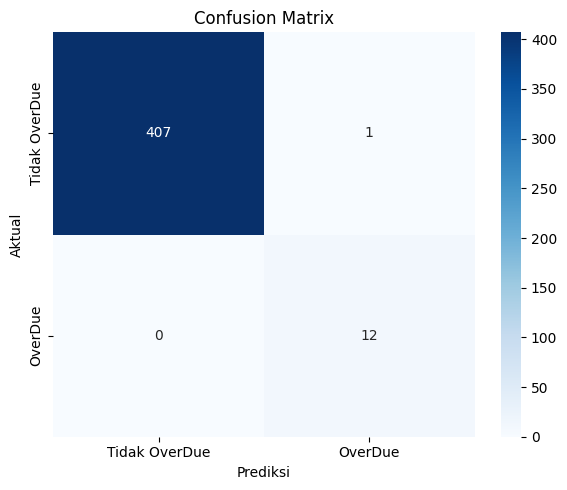

In [12]:
# Grafis hasil
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak OverDue', 'OverDue'], yticklabels=['Tidak OverDue', 'OverDue'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [13]:
# SHAP interaction values
interaction_values = explainer.shap_interaction_values(X_test)


# Cek apakah interaction_values hasilnya list (multiclass) atau array (binary/single class)
if isinstance(interaction_values, list):
    interaction = interaction_values[1]  # class index 1 (misal, OverDue)
else:
    interaction = interaction_values     # langsung pake array itu


print(interaction_values)

[[[[-5.02514543e-01  5.02514543e-01]
   [-5.93257106e-02  5.93257106e-02]
   [-2.42628539e-02  2.42628539e-02]
   [-3.13885144e-02  3.13885144e-02]
   [-1.18425847e-02  1.18425847e-02]]

  [[-5.93257106e-02  5.93257106e-02]
   [-1.68329346e-01  1.68329346e-01]
   [-6.90349610e-03  6.90349610e-03]
   [ 1.70782978e-02 -1.70782978e-02]
   [ 1.50282731e-03 -1.50282731e-03]]

  [[-2.42628539e-02  2.42628539e-02]
   [-6.90349610e-03  6.90349610e-03]
   [-1.64979603e-02  1.64979603e-02]
   [-1.46339388e-04  1.46339388e-04]
   [ 5.04224671e-03 -5.04224671e-03]]

  [[-3.13885144e-02  3.13885144e-02]
   [ 1.70782978e-02 -1.70782978e-02]
   [-1.46339388e-04  1.46339388e-04]
   [-4.81627441e-02  4.81627441e-02]
   [ 4.21097938e-03 -4.21097938e-03]]

  [[-1.18425847e-02  1.18425847e-02]
   [ 1.50282731e-03 -1.50282731e-03]
   [ 5.04224671e-03 -5.04224671e-03]
   [ 4.21097938e-03 -4.21097938e-03]
   [-6.76023255e-03  6.76023255e-03]]]


 [[[ 2.40369479e-02 -2.40369479e-02]
   [-4.12126920e-03  4.121

In [14]:
# Ambil index fitur
type_index = X_test.columns.get_loc('Type')
status_index = X_test.columns.get_loc('Status')
prior_index = X_test.columns.get_loc('Priority')
cause_index = X_test.columns.get_loc('Cause')
project_index = X_test.columns.get_loc('project')


# Ambil nilai diagonal SHAP interaction untuk tiap fitur
shap_type_values = interaction[:, type_index, type_index]
shap_status_values = interaction[:, status_index, status_index]
shap_prior_values = interaction[:, prior_index, prior_index]
shap_cause_values = interaction[:, cause_index, cause_index]
shap_project_values = interaction[:, project_index, project_index]

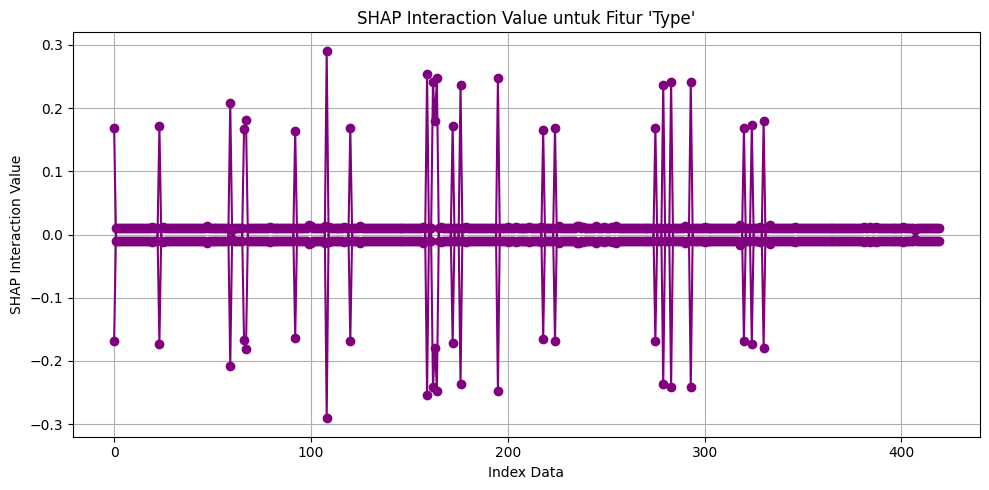

In [15]:
# --- Grafik Garis SHAP Interaction Value untuk fitur 'Type' ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(shap_type_values)), shap_type_values, marker='o', linestyle='-', color='purple')
plt.title("SHAP Interaction Value untuk Fitur 'Type'")
plt.xlabel("Index Data")
plt.ylabel("SHAP Interaction Value")
plt.grid(True)
plt.tight_layout()
plt.show()

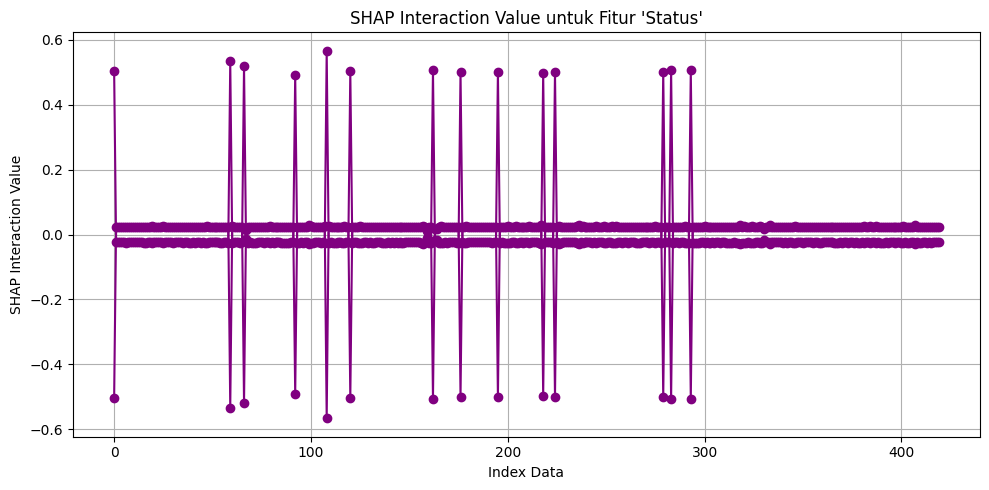

In [16]:
# --- Grafik Garis SHAP Interaction Value untuk fitur 'Status' ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(shap_status_values)), shap_status_values, marker='o', linestyle='-', color='purple')
plt.title("SHAP Interaction Value untuk Fitur 'Status'")
plt.xlabel("Index Data")
plt.ylabel("SHAP Interaction Value")
plt.grid(True)
plt.tight_layout()
plt.show()

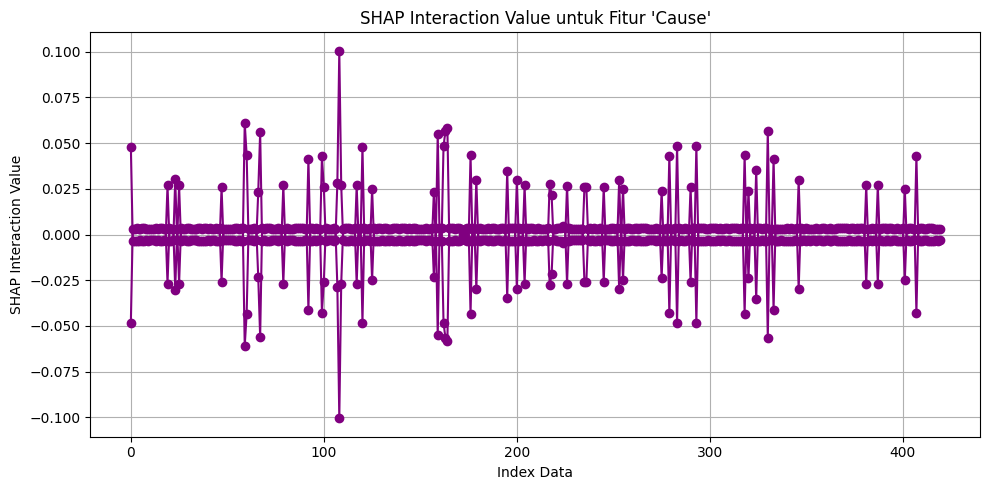

In [17]:
# --- Grafik Garis SHAP Interaction Value untuk fitur 'Cause' ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(shap_cause_values)), shap_cause_values, marker='o', linestyle='-', color='purple')
plt.title("SHAP Interaction Value untuk Fitur 'Cause'")
plt.xlabel("Index Data")
plt.ylabel("SHAP Interaction Value")
plt.grid(True)
plt.tight_layout()
plt.show()

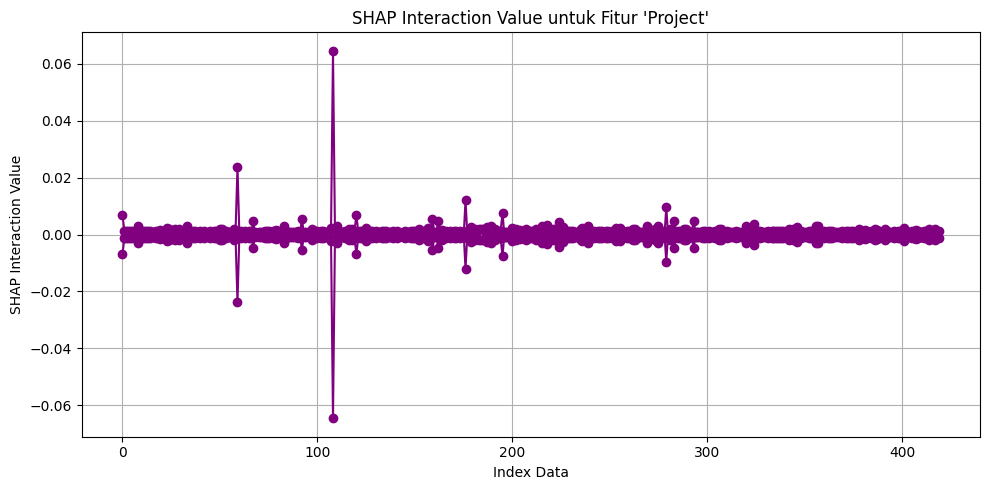

In [18]:
# --- Grafik Garis SHAP Interaction Value untuk fitur 'project' ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(shap_project_values)), shap_project_values, marker='o', linestyle='-', color='purple')
plt.title("SHAP Interaction Value untuk Fitur 'Project'")
plt.xlabel("Index Data")
plt.ylabel("SHAP Interaction Value")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

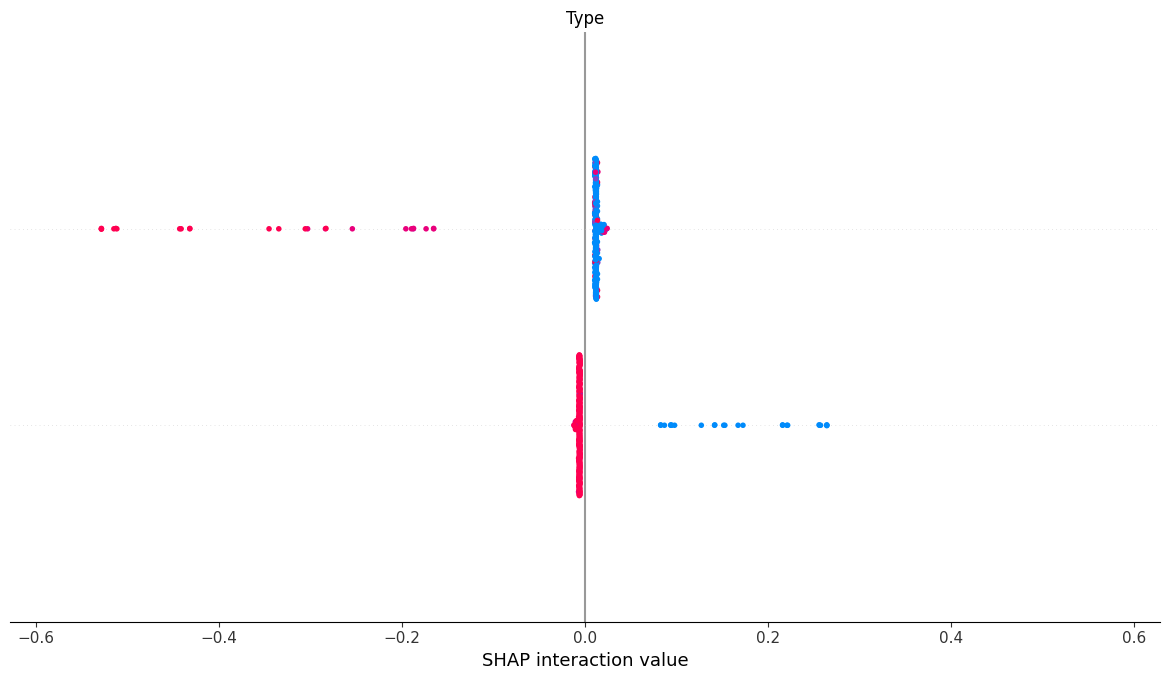

In [19]:
# Global explanation
shap.summary_plot(shap_values, X_test, plot_type="bar")

/home/abx51/.local/lib/python3.13/site-packages/shap/plots/_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


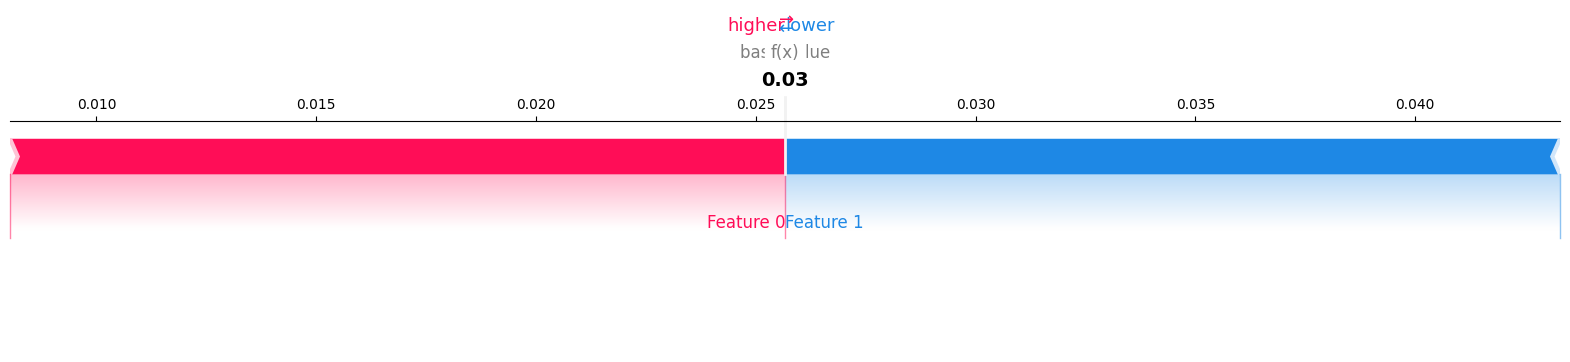

In [20]:
sample_idx = 0  # sample yang mau diliat
class_idx = 1   # index class, biasanya 1 kalau positive class

shap.plots.force(
    explainer.expected_value[class_idx],  # expected value untuk class yg dipilih
    shap_values[class_idx][sample_idx],   # shap value untuk class yg dipilih
    matplotlib=True
)
plt.show()